Introduction: Introduce the project, and your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.

The Metric: Describe your metric, and what features are you measuring. What datasets are you using?

The Best Neighborhood: Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument
.
Conclusion: Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.

*Introduction*

This project is meant to explain which neighborhood is the best in the City of Pittsburgh. We want to examine the overall quality of life in each neighborhood. We will be examining health, safety, education and food. We believe these qualities of life are the most important. We also considered things such as transportation like public transportation of buses, but believed that it was not quite as significant as our other sub metrics. Green spaces such as parks was also considered for happiness and health, but we decided to put that under the sub realm of health which will be examining trees that would be in green spaces.*

My Me*tric

The metric I will be using is based on health data that has been collected. While there are many aspects to health, I chose to focus on trees because I believe that air qualilty is a very important part of life along with trees because they have a significant contribution to oxygen and helping provide clean air for surrounding areas.

In [12]:
#start by inserting CSV file
import pandas as pd
import numpy as np
%matplotlib inline

trees = pd.read_csv("Pitt_Trees1.csv", index_col = "neighborhood")
trees.head(3)

,_id,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,...,overall_benefits_dollar_value,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,,,,,
Homewood North,1.0,7.541661e+08,7428.0,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,...,NaN,9.0,13.0,4.200313e+10,2.0,13.0,5.0,17-Mar,40.458169,-79.889724
Oakwood,2.0,1.946899e+09,220.0,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,...,125.178322,2.0,28.0,4.200356e+10,5.0,28.0,6.0,19-Jan,40.429269,-80.067868
South Side Flats,3.0,1.431517e+09,2822.0,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,...,77.767116,3.0,16.0,4.200316e+10,3.0,16.0,3.0,24-Apr,40.426797,-79.965035


In [6]:
trees.iloc[0:3, 1:39]

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,air_quality_benfits_no2avd_lbs,air_quality_benfits_so2dep_dollar_value,air_quality_benfits_so2dep_lbs,air_quality_benfits_so2avd_dollar_value,air_quality_benfits_so2avd_lbs,air_quality_benfits_pm10depdollar_value,air_quality_benfits_pm10dep_lbs,air_quality_benfits_pm10avd_dollar_value,air_quality_benfits_pm10avd_lbs,air_quality_benfits_total_dollar_value
neighborhood,,,,,,,,,,,,,,,,,,,,,
Homewood North,7.541661e+08,7428.0,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oakwood,1.946899e+09,220.0,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,0.806603,0.274901,0.078994,1.407724,0.404518,2.185328,0.262976,0.461810,0.055573,11.457438
South Side Flats,1.431517e+09,2822.0,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,0.190842,0.058725,0.016875,0.302735,0.086993,0.444639,0.053507,0.110526,0.013300,2.474653


<Axes: >

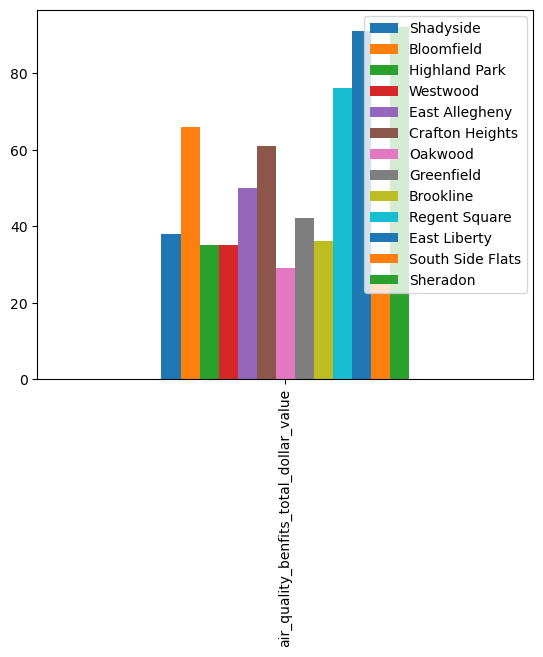

In [15]:
AirQuality = pd.DataFrame(np.random.randint(1,100,size=(1,13)), 
                   columns=['Shadyside','Bloomfield', 'Highland Park', 'Westwood', 'East Allegheny', 'Crafton Heights', 'Oakwood', 'Greenfield', 'Brookline', 'Regent Square', 'East Liberty', 'South Side Flats', 'Sheradon'], 
                   index=["air_quality_benfits_total_dollar_value"])

# Plot a bar chart
AirQuality.plot(kind="bar")